# Dataset 3 - Photogrammetry (Best Features)

This notebook contains code and explanations for the training and testing of 7 different AI architectures for the task of Human Action Recognition with best features using time series data obtained from photogrammetry markers.

## Access to Google Drive and load dataset

You need to create a shortcut in your Drive home to this folder: https://drive.google.com/drive/folders/1k2sAkmRyyctE1uOc19mrixyt2N47-7pt?usp=share_link

In [ ]:
#Drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read document
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Datasets/Dataset 3/Photogrammetry Grouped.xlsx')
df

,SUJETO,EJERCICIO,M1X,M1Y,M1Z,M10X,M10Y,M10Z,M11X,M11Y,...,M6Z,M7X,M7Y,M7Z,M8X,M8Y,M8Z,M9X,M9Y,M9Z
0,1,0,1.992625,0.425210,1.279973,1.973502,0.437671,0.755748,2.011979,0.364953,...,0.987214,1.950921,0.387718,1.490946,1.948927,0.446597,0.876668,1.981671,0.369144,0.852706
1,1,0,1.992595,0.425097,1.279844,1.973508,0.437453,0.755676,2.011892,0.365010,...,0.987262,1.950920,0.387706,1.490932,1.948922,0.446617,0.876601,1.981672,0.369114,0.852629
2,1,0,1.992625,0.425210,1.279973,1.973413,0.437636,0.755659,2.011924,0.364982,...,0.987262,1.950889,0.387748,1.490893,1.948922,0.446617,0.876601,1.981635,0.369115,0.852607
3,1,0,1.992625,0.425210,1.279973,1.973401,0.437553,0.755719,2.011924,0.364982,...,0.987189,1.950890,0.387751,1.490888,1.948969,0.446691,0.876588,1.981635,0.369115,0.852607
4,1,0,1.992632,0.425229,1.279934,1.973369,0.437562,0.755736,2.011889,0.365046,...,0.987333,1.950858,0.387856,1.490928,1.948927,0.446597,0.876668,1.981622,0.369123,0.852658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545019,4,1,2.351949,0.486036,1.175989,2.368009,0.763792,0.866502,2.348979,0.458588,...,0.908098,2.263908,0.464522,1.363363,2.372775,0.674357,0.936961,2.318070,0.658706,0.885949
545020,4,1,2.352348,0.486431,1.176423,2.367721,0.770844,0.877116,2.349819,0.459776,...,0.910092,2.263741,0.464267,1.363323,2.373366,0.678242,0.944151,2.319581,0.663517,0.893081
545021,4,1,2.352611,0.486324,1.176770,2.367403,0.775071,0.886039,2.350357,0.460842,...,0.912359,2.263673,0.464244,1.363299,2.374037,0.681490,0.951311,2.318555,0.668783,0.899832
545022,4,1,2.353041,0.486655,1.177495,2.368389,0.781853,0.897178,2.351534,0.462360,...,0.914432,2.263593,0.464031,1.363404,2.374330,0.685317,0.958843,2.319584,0.673565,0.906695


## Dataset Information

In [ ]:
#Data information
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545024 entries, 0 to 545023
Data columns (total 38 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SUJETO     545024 non-null  int64  
 1   EJERCICIO  545024 non-null  int64  
 2   M1X        545024 non-null  float64
 3   M1Y        545024 non-null  float64
 4   M1Z        545024 non-null  float64
 5   M10X       545024 non-null  float64
 6   M10Y       545024 non-null  float64
 7   M10Z       545024 non-null  float64
 8   M11X       545024 non-null  float64
 9   M11Y       545024 non-null  float64
 10  M11Z       545024 non-null  float64
 11  M12X       545024 non-null  float64
 12  M12Y       545024 non-null  float64
 13  M12Z       545024 non-null  float64
 14  M2X        545024 non-null  float64
 15  M2Y        545024 non-null  float64
 16  M2Z        545024 non-null  float64
 17  M3X        545024 non-null  float64
 18  M3Y        545024 non-null  float64
 19  M3Z        545024 non-n

(545024, 38)

### Dataset information plot

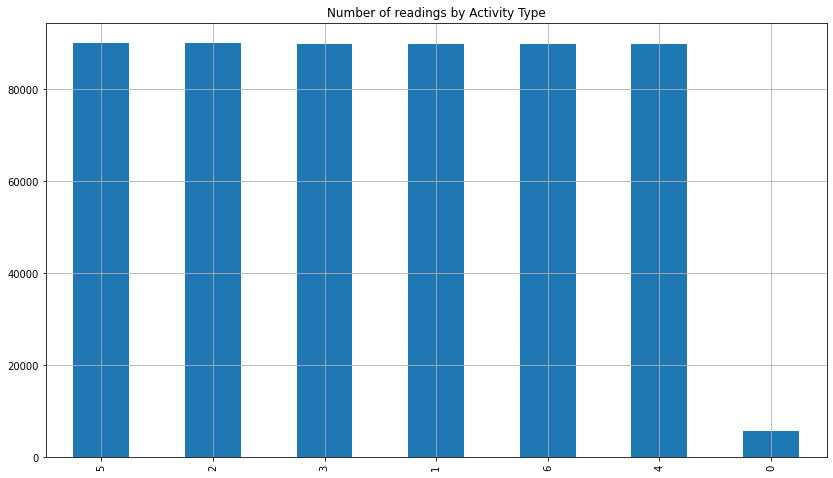

In [ ]:
#Readings per activity
countOfActivities = df['EJERCICIO'].value_counts()
countOfActivities.plot(kind='bar',title='Number of readings by Activity Type',figsize=(14,8),grid=True);

In [ ]:
def plot_activity(activity,df,start=0,stop=200):
  extractRowsOfActivity = (df['EJERCICIO'] == int(activity))  # Output will be true/false.
  data = df[extractRowsOfActivity] # data has only rows that are for the requested activity.
  data = data[['M1X', 'M1Y', 'M1Z', 'M2X', 'M2Y', 'M2Z', 'M3X', 'M3Y', 'M3Z', 'M4X', 'M4Y', 'M4Z', 'M5X', 'M5Y', 'M5Z', 'M6X', 'M6Y', 'M6Z', 'M7X', 'M7Y', 'M7Z', 'M8X', 'M8Y', 'M8Z', 'M9X', 'M9Y', 'M9Z', 'M10X', 'M10Y', 'M10Z', 'M11X', 'M11Y', 'M11Z', 'M12X', 'M12Y', 'M12Z']] # data has only the accelerometer columns.
  data = data[start:stop]
  
  ax = data.plot(subplots=True,figsize=(16,12),title=activity+ ', Start Row: '+str(start)+' Stop row: '+str(stop)) # Plot accelerometer for the activity.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

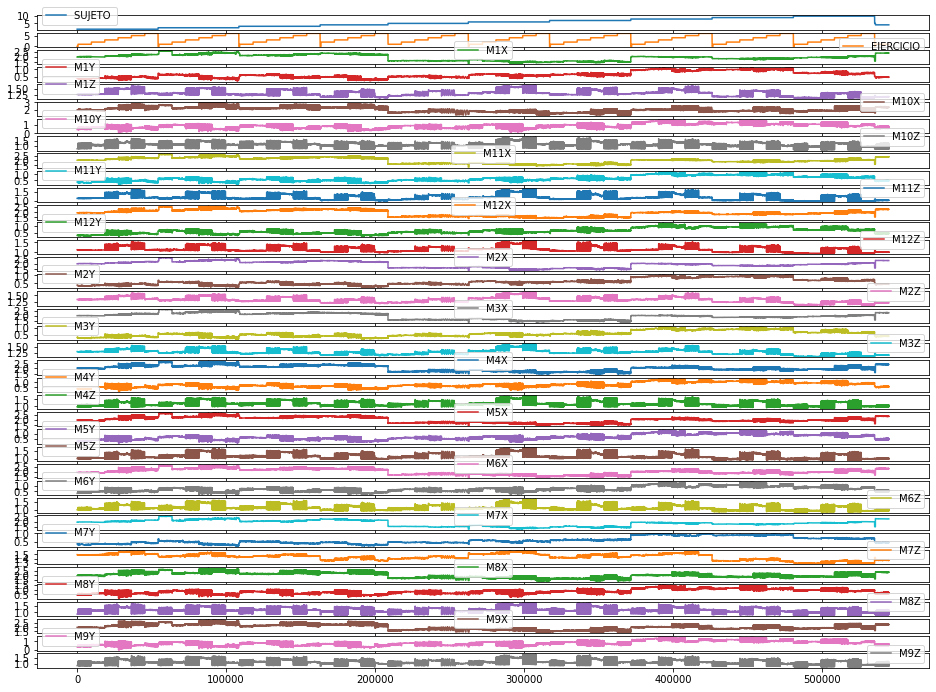

In [ ]:
df.plot(subplots=True,figsize=(16,12)) 

### Feature Importance

**Method:** Random Forest

In [ ]:
df.iloc[:, 2:]

,M1X,M1Y,M1Z,M10X,M10Y,M10Z,M11X,M11Y,M11Z,M12X,...,M6Z,M7X,M7Y,M7Z,M8X,M8Y,M8Z,M9X,M9Y,M9Z
0,1.992625,0.425210,1.279973,1.973502,0.437671,0.755748,2.011979,0.364953,1.138261,1.949143,...,0.987214,1.950921,0.387718,1.490946,1.948927,0.446597,0.876668,1.981671,0.369144,0.852706
1,1.992595,0.425097,1.279844,1.973508,0.437453,0.755676,2.011892,0.365010,1.138346,1.949090,...,0.987262,1.950920,0.387706,1.490932,1.948922,0.446617,0.876601,1.981672,0.369114,0.852629
2,1.992625,0.425210,1.279973,1.973413,0.437636,0.755659,2.011924,0.364982,1.138274,1.949012,...,0.987262,1.950889,0.387748,1.490893,1.948922,0.446617,0.876601,1.981635,0.369115,0.852607
3,1.992625,0.425210,1.279973,1.973401,0.437553,0.755719,2.011924,0.364982,1.138274,1.949046,...,0.987189,1.950890,0.387751,1.490888,1.948969,0.446691,0.876588,1.981635,0.369115,0.852607
4,1.992632,0.425229,1.279934,1.973369,0.437562,0.755736,2.011889,0.365046,1.138372,1.948992,...,0.987333,1.950858,0.387856,1.490928,1.948927,0.446597,0.876668,1.981622,0.369123,0.852658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545019,2.351949,0.486036,1.175989,2.368009,0.763792,0.866502,2.348979,0.458588,1.032685,2.272007,...,0.908098,2.263908,0.464522,1.363363,2.372775,0.674357,0.936961,2.318070,0.658706,0.885949
545020,2.352348,0.486431,1.176423,2.367721,0.770844,0.877116,2.349819,0.459776,1.033123,2.272824,...,0.910092,2.263741,0.464267,1.363323,2.373366,0.678242,0.944151,2.319581,0.663517,0.893081
545021,2.352611,0.486324,1.176770,2.367403,0.775071,0.886039,2.350357,0.460842,1.033366,2.271748,...,0.912359,2.263673,0.464244,1.363299,2.374037,0.681490,0.951311,2.318555,0.668783,0.899832
545022,2.353041,0.486655,1.177495,2.368389,0.781853,0.897178,2.351534,0.462360,1.033864,2.272354,...,0.914432,2.263593,0.464031,1.363404,2.374330,0.685317,0.958843,2.319584,0.673565,0.906695


In [ ]:
df.iloc[:, 1]

0         0
1         0
2         0
3         0
4         0
         ..
545019    1
545020    1
545021    1
545022    1
545023    1
Name: EJERCICIO, Length: 545024, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X, X_test, Y, Y_test = train_test_split(df.iloc[:, 2:], df.iloc[:, 1], test_size=.2,random_state=4)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=.2,random_state=4)
X_train.shape

(348815, 36)

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data
clf.fit(X_train, Y_train)

def list_importances(features, importances):
  zipped = zip(features, importances)
  df = pd.DataFrame(list(sorted(zipped, reverse=True, key = lambda x: x[1])), columns =['Features', 'Importance'])
  return df

features = list(df.columns)[2:]
df_importance = list_importances(features, clf.feature_importances_)
df_importance

,Features,Importance
0,M10Z,0.058742
1,M8Z,0.049461
2,M7X,0.049044
3,M11Z,0.040701
4,M5Z,0.038635
5,M2X,0.036924
6,M9Z,0.035812
7,M3X,0.035589
8,M7Y,0.035361
9,M12Z,0.033425


## Preprocessing

- Normalizing the measurements to be between 0 and 1.
- Transforming the measurements to be in a 3-D array of [samples, timesteps,features].
- One hot encoding the activity names.
- Breaking the 3-D array into a training and test dataset. 

### Data Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df['M1X_mms'] = mms.fit_transform(df[['M1Y']])
df['M1Y_mms'] = mms.fit_transform(df[['M1Y']])
df['M1Z_mms'] = mms.fit_transform(df[['M1Z']])

df['M2X_mms'] = mms.fit_transform(df[['M2X']])
df['M2Y_mms'] = mms.fit_transform(df[['M2Y']])
df['M2Z_mms'] = mms.fit_transform(df[['M2Z']])

df['M3X_mms'] = mms.fit_transform(df[['M3X']])
df['M3Y_mms'] = mms.fit_transform(df[['M3Y']])
df['M3Z_mms'] = mms.fit_transform(df[['M3Z']])

df['M4X_mms'] = mms.fit_transform(df[['M4X']])
df['M4Y_mms'] = mms.fit_transform(df[['M4Y']])
df['M4Z_mms'] = mms.fit_transform(df[['M4Z']])

df['M5X_mms'] = mms.fit_transform(df[['M5X']])
df['M5Y_mms'] = mms.fit_transform(df[['M5Y']])
df['M5Z_mms'] = mms.fit_transform(df[['M5Z']])

df['M6X_mms'] = mms.fit_transform(df[['M6X']])
df['M6Y_mms'] = mms.fit_transform(df[['M6Y']])
df['M6Z_mms'] = mms.fit_transform(df[['M6Z']])

df['M7X_mms'] = mms.fit_transform(df[['M7X']])
df['M7Y_mms'] = mms.fit_transform(df[['M7Y']])
df['M7Z_mms'] = mms.fit_transform(df[['M7Z']])

df['M8X_mms'] = mms.fit_transform(df[['M8X']])
df['M8Y_mms'] = mms.fit_transform(df[['M8Y']])
df['M8Z_mms'] = mms.fit_transform(df[['M8Z']])

df['M9X_mms'] = mms.fit_transform(df[['M9X']])
df['M9Y_mms'] = mms.fit_transform(df[['M9Y']])
df['M9Z_mms'] = mms.fit_transform(df[['M9Z']])

df['M10X_mms'] = mms.fit_transform(df[['M10X']])
df['M10Y_mms'] = mms.fit_transform(df[['M10Y']])
df['M10Z_mms'] = mms.fit_transform(df[['M10Z']])

df['M11X_mms'] = mms.fit_transform(df[['M11X']])
df['M11Y_mms'] = mms.fit_transform(df[['M11Y']])
df['M11Z_mms'] = mms.fit_transform(df[['M11Z']])

df['M12X_mms'] = mms.fit_transform(df[['M12X']])
df['M12Y_mms'] = mms.fit_transform(df[['M12Y']])
df['M12Z_mms'] = mms.fit_transform(df[['M12Z']])

df.describe().round(2)

,SUJETO,EJERCICIO,M1X,M1Y,M1Z,M10X,M10Y,M10Z,M11X,M11Y,...,M9Z_mms,M10X_mms,M10Y_mms,M10Z_mms,M11X_mms,M11Y_mms,M11Z_mms,M12X_mms,M12Y_mms,M12Z_mms
count,545024.00,545024.00,545024.00,545024.00,545024.00,545024.00,545024.00,545024.00,545024.00,545024.00,...,545024.00,545024.00,545024.00,545024.00,545024.00,545024.00,545024.00,545024.00,545024.00,545024.00
mean,5.50,3.46,1.96,0.66,1.32,2.07,0.89,1.12,2.00,0.65,...,0.37,0.47,0.53,0.39,0.51,0.45,0.33,0.46,0.41,0.31
std,2.87,1.74,0.28,0.20,0.11,0.33,0.28,0.23,0.29,0.23,...,0.18,0.19,0.18,0.19,0.22,0.21,0.21,0.23,0.22,0.20
min,1.00,0.00,1.37,0.24,1.13,1.27,0.06,0.65,1.31,0.17,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,2.00,1.65,0.50,1.25,1.83,0.68,0.95,1.71,0.48,...,0.22,0.33,0.39,0.24,0.30,0.29,0.18,0.24,0.24,0.18
50%,6.00,3.00,2.00,0.63,1.31,2.04,0.90,1.13,2.03,0.63,...,0.35,0.45,0.54,0.39,0.54,0.42,0.29,0.48,0.40,0.26
75%,8.00,5.00,2.20,0.76,1.39,2.30,1.07,1.30,2.24,0.81,...,0.50,0.60,0.64,0.53,0.69,0.59,0.47,0.65,0.53,0.44
max,10.00,6.00,2.59,1.10,1.65,2.98,1.63,1.87,2.65,1.25,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Transformation of dimensions as a 3D array

Considering the size of the dataset, a number of samples of 200 was considered enough to have good training and test sets

In [ ]:
# M7Z	0.122946
# M7Y	0.102519
# M2X	0.080367
# M3X	0.077868
# M7X	0.074274
# M1X	0.068523
# M2Y	0.057782
# M2Z	0.054129
# M1Y	0.044094
# M3Y	0.033982
# M3Z	0.033835
# M11X	0.026961
# M5X	0.022686
# M12X	0.021192
# M12Z	0.020308

In [ ]:
import numpy as np
from scipy import stats
nSamplesInEach = 100
nFeatures = 15
samples = []
labels = []
for i in range(0,len(df)-nSamplesInEach,nSamplesInEach):
  m1x = df['M1X_mms'].values[i:i+nSamplesInEach]
  m1y = df['M1Y_mms'].values[i:i+nSamplesInEach]
  # m1z = df['M1Z_mms'].values[i:i+nSamplesInEach]

  m2x = df['M2X_mms'].values[i:i+nSamplesInEach]
  m2y = df['M2Y_mms'].values[i:i+nSamplesInEach]
  m2z = df['M2Z_mms'].values[i:i+nSamplesInEach]

  m3x = df['M3X_mms'].values[i:i+nSamplesInEach]
  m3y = df['M3Y_mms'].values[i:i+nSamplesInEach]
  m3z = df['M3Z_mms'].values[i:i+nSamplesInEach]

  # m4x = df['M4X_mms'].values[i:i+nSamplesInEach]
  # m4y = df['M4Y_mms'].values[i:i+nSamplesInEach]
  # m4z = df['M4Z_mms'].values[i:i+nSamplesInEach]

  m5x = df['M5X_mms'].values[i:i+nSamplesInEach]
  # m5y = df['M5Y_mms'].values[i:i+nSamplesInEach]
  # m5z = df['M5Z_mms'].values[i:i+nSamplesInEach]

  # m6x = df['M6X_mms'].values[i:i+nSamplesInEach]
  # m6y = df['M6Y_mms'].values[i:i+nSamplesInEach]
  # m6z = df['M6Z_mms'].values[i:i+nSamplesInEach]

  m7x = df['M7X_mms'].values[i:i+nSamplesInEach]
  m7y = df['M7Y_mms'].values[i:i+nSamplesInEach]
  m7z = df['M7Z_mms'].values[i:i+nSamplesInEach]

  # m8x = df['M8X_mms'].values[i:i+nSamplesInEach]
  # m8y = df['M8Y_mms'].values[i:i+nSamplesInEach]
  # m8z = df['M8Z_mms'].values[i:i+nSamplesInEach]

  # m9x = df['M9X_mms'].values[i:i+nSamplesInEach]
  # m9y = df['M9Y_mms'].values[i:i+nSamplesInEach]
  # m9z = df['M9Z_mms'].values[i:i+nSamplesInEach]

  # m10x = df['M10X_mms'].values[i:i+nSamplesInEach]
  # m10y = df['M10Y_mms'].values[i:i+nSamplesInEach]
  # m10z = df['M10Z_mms'].values[i:i+nSamplesInEach]

  m11x = df['M11X_mms'].values[i:i+nSamplesInEach]
  # m11y = df['M11Y_mms'].values[i:i+nSamplesInEach]
  # m11z = df['M11Z_mms'].values[i:i+nSamplesInEach]

  m12x = df['M12X_mms'].values[i:i+nSamplesInEach]
  # m12y = df['M12Y_mms'].values[i:i+nSamplesInEach]
  m12z = df['M12Z_mms'].values[i:i+nSamplesInEach]

  label = stats.mode(df['EJERCICIO'][i:i+nSamplesInEach])
  label = label[0][0]

  samples.append([m1x, m1y, m2x, m2y, m2z, m3x, m3y, m3z, m5x, m7x, m7y, m7z, m11x, m12x, m12z])
  # samples.append([m1x, m1y, m1z, m2x, m2y, m2z, m3x, m3y, m3z, m4x, m4y, m4z, m5x, m5y, m5z, m6x, m6y, m6z, m7x, m7y, m7z, m8x, m8y, m8z, m9x, m9y, m9z, m10x, m10y, m10z, m11x, m11y, m11z, m12x, m12y, m12z])
  labels.append(label)

np.array(samples).shape

<ipython-input-15-c8ae67f07a3a>:56: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df['EJERCICIO'][i:i+nSamplesInEach])


(5450, 15, 100)

### Reshape

This is necessary so that the dimensions of the tensor are in the correct order, that is, to change the shape from (samples, features, timesteps) to (samples, timesteps, features).

In [ ]:
reshaped_s = np.array(samples).reshape(-1,nSamplesInEach,nFeatures)
np.array(reshaped_s).shape

(5450, 100, 15)

In [ ]:
# Length of dataset after preprocessing
print(len(reshaped_s))

5450


### Label Encoding

To make training easier, the labels are encoded to binary values, which are easier to process and map in a neural network.

In [ ]:
#Labels 
orig_labels = list(dict.fromkeys(labels)) # Get unique labels
print(orig_labels)
labels[:10]

[0, 1, 2, 3, 4, 5, 6]


[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [ ]:
labels = np.array(pd.get_dummies(labels))
labels[:10]

array([[1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
# Identify unique encoded labels
_, idx = np.unique(labels, axis=0, return_index=True)
encoded_labels = labels[np.sort(idx)]
print(encoded_labels)

[[1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]]


In [ ]:
# Shape of the label list
labels.shape

(5450, 7)

## Creation of training and testing splits



In [ ]:
#Training and Test Data
#Split into Train and Test Data sets
#We'll use 80% of the measurements for training, 20% of that will go to validation.
#20% of the set will be destined to testing

from sklearn.model_selection import train_test_split
X, X_test, Y, Y_test = train_test_split(reshaped_s, labels, test_size=.2,random_state=4)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=.2,random_state=4)
len(X_train)

3488

In [ ]:
len(X_test)

1090

### Samples per Class

Count of samples for each class for training and testing

In [ ]:
# Count how many elements 
def class_count(split, classes):
  counts = []
  for i in classes:
    count = np.where((split == i).all(axis=1))[0].size  # count the number of times the row i in classes is present in the split array.
    counts.append(count)
  return counts

train_counts = class_count(Y_train, encoded_labels)
val_counts = class_count(Y_val, encoded_labels)
test_counts = class_count(Y_test, encoded_labels)

samples_df = pd.DataFrame(list(zip(orig_labels, train_counts, val_counts, test_counts)), 
                  columns =['Class', 'Training','Validation', 'Testing'])

samples_df.loc['Total'] = samples_df.sum(numeric_only=True)
samples_df.loc[:,'Total'] = samples_df.sum(numeric_only=True, axis=1)
samples_df

,Class,Training,Validation,Testing,Total
0,0,40,9,8,57
1,1,578,136,184,899
2,2,582,143,175,902
3,3,563,157,179,902
4,4,585,138,175,902
5,5,556,141,203,905
6,6,584,148,166,904
Total,21,3488,872,1090,5471


In [ ]:
# Get the input shape -> (samples, time steps, features)
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features,n_outputs))

n_timesteps: 100, n_features: 15, n_outputs: 7


## Architectures

### Architecture 1: LSTM(128) + Dropout + Fully Connected + Fully Connected

Source: https://www.analyticsvidhya.com/blog/2021/07/implementing-lstm-for-human-activity-recognition-using-smartphone-accelerometer-data/

This simple architecture uses a LSTM layer of 128 neurons to process the time series data, then a dropout layer to prevent overfitting, and two fully connected layers to map the information from previous layers to the 4 outputs.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten, Reshape

In [ ]:
model = Sequential()
# RNN layer
model.add(LSTM(units = 128, input_shape = (X_train.shape[1], X_train.shape[2])))
# Dropout layer
model.add(Dropout(0.5)) 
# Dense layer with ReLu
model.add(Dense(units = 64, activation='relu'))
# Softmax layer
model.add(Dense(n_outputs, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               73728     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                                 
Total params: 82,439
Trainable params: 82,439
Non-trainable params: 0
_________________________________________________________________


#### Loss function and optimizer

**Loss function:** Categorical Cross Entropy

**Optimizer:** Adam

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Train the model

Train the model for 100 epochs in mini-batches of 64 samples. This is 100 iterations over all samples in the `x_train` and `y_train` tensors. While training, monitor the model's loss and accuracy on the samples from the validation set:

In [ ]:
history = model.fit(X_train, Y_train, epochs = 100, validation_data=(X_val, Y_val), batch_size = 64, verbose = 1)

Epoch 1/100
55/55 [==============================] - 10s 24ms/step - loss: 1.7070 - accuracy: 0.2517 - val_loss: 1.4864 - val_accuracy: 0.3360
Epoch 2/100
55/55 [==============================] - 1s 9ms/step - loss: 1.4206 - accuracy: 0.3486 - val_loss: 1.3350 - val_accuracy: 0.3716
Epoch 3/100
55/55 [==============================] - 0s 9ms/step - loss: 1.3508 - accuracy: 0.3713 - val_loss: 1.3336 - val_accuracy: 0.4140
Epoch 4/100
55/55 [==============================] - 0s 9ms/step - loss: 1.3284 - accuracy: 0.3847 - val_loss: 1.2408 - val_accuracy: 0.4381
Epoch 5/100
55/55 [==============================] - 0s 9ms/step - loss: 1.2846 - accuracy: 0.4212 - val_loss: 1.3068 - val_accuracy: 0.4117
Epoch 6/100
55/55 [==============================] - 0s 9ms/step - loss: 1.2768 - accuracy: 0.4192 - val_loss: 1.2703 - val_accuracy: 0.4369
Epoch 7/100
55/55 [==============================] - 0s 9ms/step - loss: 1.2437 - accuracy: 0.4398 - val_loss: 1.2429 - val_accuracy: 0.4243
Epoch 8/100

#### Evaluate the model

In [ ]:
results = model.evaluate(X_test, Y_test, batch_size = 64, verbose = 1)
arch1_test_acc = results[1]
arch1_test_loss = results[0]
print("Test Accuracy :", results[1])
print("Test Loss :", results[0])

18/18 [==============================] - 0s 5ms/step - loss: 0.2919 - accuracy: 0.9257
Test Accuracy : 0.9256880879402161
Test Loss : 0.2919110357761383


#### Create a graph of accuracy and loss over time

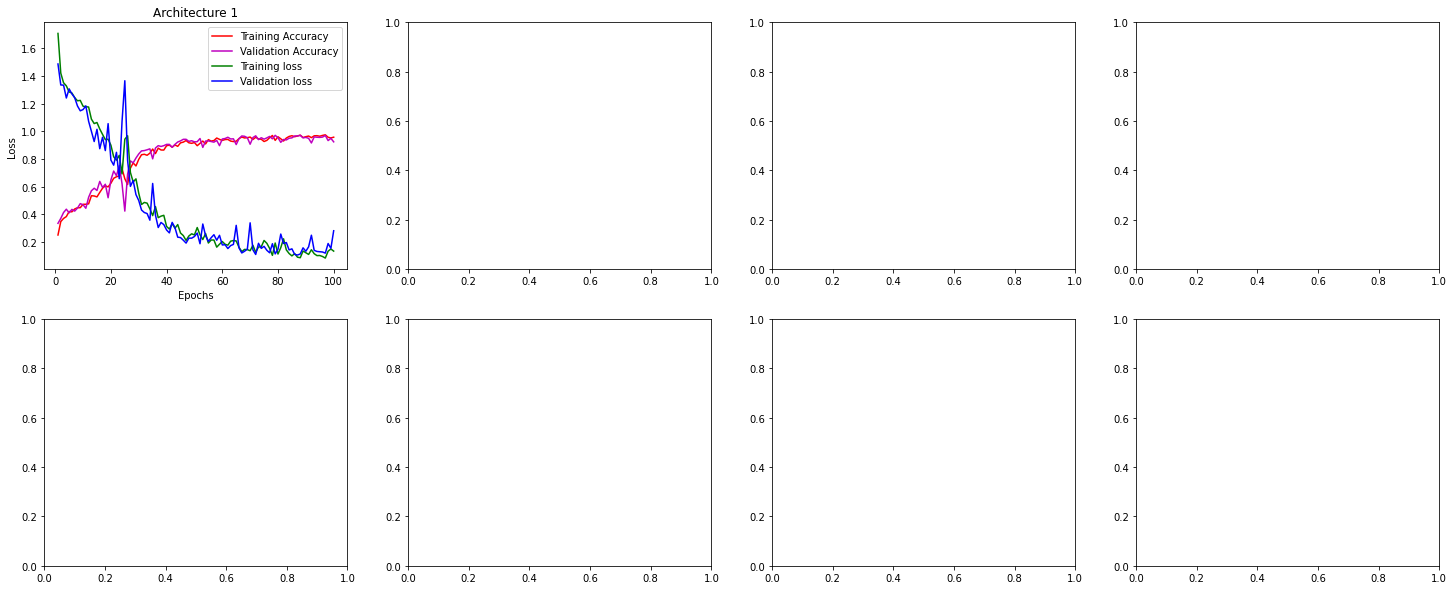

In [ ]:
history_dict = history.history

import matplotlib.pyplot as plt

# Get the historical values for accuracies and losses

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Save the last values for accuracies and losses for comparison

arch1_train_acc = acc[-1]
arch1_val_acc = val_acc[-1]
arch1_train_loss = loss[-1]
arch1_val_loss = val_loss[-1]

epochs = range(1, len(acc) + 1)

# Create 7 subplots in a grid with 3 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))

axes[0, 0].plot(epochs, acc , 'r', label='Training Accuracy')
axes[0, 0].plot(epochs,val_acc , 'm', label='Validation Accuracy')
axes[0, 0].plot(epochs, loss, 'g', label='Training loss')
axes[0, 0].plot(epochs, val_loss, 'b', label='Validation loss')
axes[0, 0].set_title("Architecture 1")
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

### Architecture 2: LSTM(128) + Dropout + LSTM(64) + Dropout + Fully Connected

Source: https://github.com/srvds/Human-Activity-Recognition

This architecture uses a LSTM layer of 128 neurons to process the time series data, then a dropout layer to prevent overfitting, another LSTM and another dropout layer for improving the previous architecture, and a fully connected layer to map the information from previous layers to the 4 outputs.

#### Loss function and training

In [ ]:
# Initiliazing the sequential model
model = keras.Sequential()
# Configuring the parameters
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# Adding a dropout layer
model.add(Dropout(0.5))
# Add another LSTM layer
model.add(LSTM(64))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_outputs, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 128)          73728     
                                                                 
 dropout_1 (Dropout)         (None, 100, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 455       
                                                                 
Total params: 123,591
Trainable params: 123,591
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#lost function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs = 100, validation_data=(X_val, Y_val), batch_size = 64, verbose = 1)

Epoch 1/100
55/55 [==============================] - 5s 30ms/step - loss: 1.7287 - accuracy: 0.2537 - val_loss: 1.5091 - val_accuracy: 0.3349
Epoch 2/100
55/55 [==============================] - 1s 14ms/step - loss: 1.4883 - accuracy: 0.3351 - val_loss: 1.3733 - val_accuracy: 0.4300
Epoch 3/100
55/55 [==============================] - 1s 14ms/step - loss: 1.4136 - accuracy: 0.3544 - val_loss: 1.3588 - val_accuracy: 0.4014
Epoch 4/100
55/55 [==============================] - 1s 12ms/step - loss: 1.3640 - accuracy: 0.3721 - val_loss: 1.2807 - val_accuracy: 0.4358
Epoch 5/100
55/55 [==============================] - 1s 14ms/step - loss: 1.3686 - accuracy: 0.3784 - val_loss: 1.2850 - val_accuracy: 0.4255
Epoch 6/100
55/55 [==============================] - 1s 18ms/step - loss: 1.3078 - accuracy: 0.4120 - val_loss: 1.2441 - val_accuracy: 0.4862
Epoch 7/100
55/55 [==============================] - 1s 18ms/step - loss: 1.2837 - accuracy: 0.4300 - val_loss: 1.2146 - val_accuracy: 0.4564
Epoch 

#### Evaluate the model

In [ ]:
#Evaluate the model
results = model.evaluate(X_test, Y_test, batch_size = 64, verbose = 1)
arch2_test_acc = results[1]
arch2_test_loss = results[0]
print("Test Accuracy :", results[1])
print("Test Loss :", results[0])

18/18 [==============================] - 0s 6ms/step - loss: 0.1912 - accuracy: 0.9404
Test Accuracy : 0.9403669834136963
Test Loss : 0.19118310511112213


#### Create a graph of accuracy and loss over time

In [ ]:
history_dict = history.history

import matplotlib.pyplot as plt

# Get the historical values for accuracies and losses

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Save the last values for accuracies and losses for comparison

arch2_train_acc = acc[-1]
arch2_val_acc = val_acc[-1]
arch2_train_loss = loss[-1]
arch2_val_loss = val_loss[-1]

epochs = range(1, len(acc) + 1)

axes[0, 1].plot(epochs, acc , 'r', label='Training Accuracy')
axes[0, 1].plot(epochs,val_acc , 'm', label='Validation Accuracy')
axes[0, 1].plot(epochs, loss, 'g', label='Training loss')
axes[0, 1].plot(epochs, val_loss, 'b', label='Validation loss')
axes[0, 1].set_title("Architecture 2")
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

### Architecture 3: Conv1D(64) + Conv1D(64) + Dropout + Max Pooling + Flatten + Fully Connected + Fully Connected

Source: https://github.com/CDAC-lab/ETFA-Workshop/blob/main/CNN%20and%20LSTM%20for%20Human%20Activity%20Recognition.ipynb

This architecture focuses on convolutional neural networks. The first two layers are 1D convolutions of 64 filters, then a dropout layer to prevent overfitting, a max pooling layer to reduce dimensionality, a flatten layer to use dense layers, and two fully connected layers to map the information from previous layers to the 4 outputs.

In [ ]:
# Define the model
model = keras.Sequential()

# Add a 1D Convolutional layer with 32 filters and a kernel size of 3
model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features)))

# Add a 1D Convolutional layer with 64 filters and a kernel size of 3
model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features)))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(rate=0.5))

# Add a Max Pooling layer with a pool size of 2
model.add(MaxPooling1D(pool_size=2))

# Add a Flatten layer
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(units=100, activation='relu'))

# Add an output layer
model.add(Dense(units=n_outputs, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 97, 64)            3904      
                                                                 
 conv1d_1 (Conv1D)           (None, 94, 64)            16448     
                                                                 
 dropout_3 (Dropout)         (None, 94, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 47, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3008)              0         
                                                                 
 dense_3 (Dense)             (None, 100)               300900    
                                                      

#### Loss function and training

In [ ]:
#lost function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs = 100, validation_data=(X_val, Y_val), batch_size = 64, verbose = 1)

Epoch 1/100
55/55 [==============================] - 8s 19ms/step - loss: 1.6755 - accuracy: 0.2841 - val_loss: 1.4176 - val_accuracy: 0.4369
Epoch 2/100
55/55 [==============================] - 0s 8ms/step - loss: 1.1753 - accuracy: 0.5255 - val_loss: 0.9873 - val_accuracy: 0.6284
Epoch 3/100
55/55 [==============================] - 0s 8ms/step - loss: 0.8165 - accuracy: 0.6700 - val_loss: 0.7527 - val_accuracy: 0.7317
Epoch 4/100
55/55 [==============================] - 0s 8ms/step - loss: 0.6674 - accuracy: 0.7337 - val_loss: 0.5843 - val_accuracy: 0.7947
Epoch 5/100
55/55 [==============================] - 0s 8ms/step - loss: 0.5279 - accuracy: 0.8093 - val_loss: 0.5373 - val_accuracy: 0.8131
Epoch 6/100
55/55 [==============================] - 0s 8ms/step - loss: 0.5055 - accuracy: 0.8157 - val_loss: 0.4454 - val_accuracy: 0.8555
Epoch 7/100
55/55 [==============================] - 0s 8ms/step - loss: 0.4147 - accuracy: 0.8604 - val_loss: 0.4082 - val_accuracy: 0.8956
Epoch 8/100


#### Evaluate the model

In [ ]:
#Evaluate the model
results = model.evaluate(X_test, Y_test, batch_size = 64, verbose = 1)
arch3_test_acc = results[1]
arch3_test_loss = results[0]
print("Test Accuracy :", results[1])
print("Test Loss :", results[0])

18/18 [==============================] - 0s 8ms/step - loss: 0.1191 - accuracy: 0.9789
Test Accuracy : 0.9788990616798401
Test Loss : 0.11912851780653


#### Create a graph of accuracy and loss over time

In [ ]:
#Create a graph of accuracy and loss over time
history_dict = history.history

import matplotlib.pyplot as plt

# Get the historical values for accuracies and losses

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Save the last values for accuracies and losses for comparison

arch3_train_acc = acc[-1]
arch3_val_acc = val_acc[-1]
arch3_train_loss = loss[-1]
arch3_val_loss = val_loss[-1]

epochs = range(1, len(acc) + 1)

axes[0, 2].plot(epochs, acc , 'r', label='Training Accuracy')
axes[0, 2].plot(epochs,val_acc , 'm', label='Validation Accuracy')
axes[0, 2].plot(epochs, loss, 'g', label='Training loss')
axes[0, 2].plot(epochs, val_loss, 'b', label='Validation loss')
axes[0, 2].set_title("Architecture 3")
axes[0, 2].set_xlabel('Epochs')
axes[0, 2].set_ylabel('Loss')
axes[0, 2].legend()

### Architecture 4: Conv1D(32) + Max Pooling + LSTM(128) + Dropout + Fully Connected + Fully Connected

Source: None, the network was done empyrically

This architecture uses a 1D convolutional layer of 32 filters, then a max pooling layer to reduce dimensionality, a LSTM layer of 128 units, a dropout layer to prevent overfitting, and two fully connected layers to map the information from previous layers to the 4 outputs.

In [ ]:
# Define the model
model = keras.Sequential()

# Add a 1D Convolutional layer with 32 filters and a kernel size of 3
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))

# Add a Max Pooling layer with a pool size of 2
model.add(MaxPooling1D(pool_size=2))

# Add an LSTM layer with 128 units
model.add(LSTM(units=128))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(rate=0.5))

# Add a fully connected layer
model.add(Dense(units=64, activation='relu'))

# Add an output layer
model.add(Dense(units=n_outputs, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 98, 32)            1472      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 49, 32)           0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 128)               82432     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 7)                 455       
                                                      

#### Loss Function and training

In [ ]:
#lost function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs = 100, validation_data=(X_val, Y_val), batch_size = 64, verbose = 1)

Epoch 1/100
55/55 [==============================] - 5s 23ms/step - loss: 1.7977 - accuracy: 0.2139 - val_loss: 1.6264 - val_accuracy: 0.2982
Epoch 2/100
55/55 [==============================] - 0s 9ms/step - loss: 1.5099 - accuracy: 0.3108 - val_loss: 1.3970 - val_accuracy: 0.3463
Epoch 3/100
55/55 [==============================] - 0s 8ms/step - loss: 1.3929 - accuracy: 0.3524 - val_loss: 1.3154 - val_accuracy: 0.3830
Epoch 4/100
55/55 [==============================] - 0s 8ms/step - loss: 1.3279 - accuracy: 0.3979 - val_loss: 1.2513 - val_accuracy: 0.4197
Epoch 5/100
55/55 [==============================] - 0s 8ms/step - loss: 1.2829 - accuracy: 0.4192 - val_loss: 1.2454 - val_accuracy: 0.4553
Epoch 6/100
55/55 [==============================] - 0s 8ms/step - loss: 1.2363 - accuracy: 0.4550 - val_loss: 1.1371 - val_accuracy: 0.4908
Epoch 7/100
55/55 [==============================] - 0s 9ms/step - loss: 1.1531 - accuracy: 0.5000 - val_loss: 1.1351 - val_accuracy: 0.4954
Epoch 8/100


#### Evaluate the model

In [ ]:
#Evaluate the model
results = model.evaluate(X_test, Y_test, batch_size = 64, verbose = 1)
arch4_test_acc = results[1]
arch4_test_loss = results[0]
print("Test Accuracy :", results[1])
print("Test Loss :", results[0])

18/18 [==============================] - 0s 6ms/step - loss: 0.1297 - accuracy: 0.9670
Test Accuracy : 0.9669724702835083
Test Loss : 0.12965458631515503


#### Create a graph of accuracy and loss over time

In [ ]:
#Create a graph of accuracy and loss over time
history_dict = history.history

import matplotlib.pyplot as plt

# Get the historical values for accuracies and losses

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Save the last values for accuracies and losses for comparison

arch4_train_acc = acc[-1]
arch4_val_acc = val_acc[-1]
arch4_train_loss = loss[-1]
arch4_val_loss = val_loss[-1]

epochs = range(1, len(acc) + 1)

axes[0, 3].plot(epochs, acc , 'r', label='Training Accuracy')
axes[0, 3].plot(epochs,val_acc , 'm', label='Validation Accuracy')
axes[0, 3].plot(epochs, loss, 'g', label='Training loss')
axes[0, 3].plot(epochs, val_loss, 'b', label='Validation loss')
axes[0, 3].set_title("Architecture 4")
axes[0, 3].set_xlabel('Epochs')
axes[0, 3].set_ylabel('Loss')
axes[0, 3].legend()

### Architecture 5: Conv1D(32) + Conv1D(64) + Max Pooling + Bidirectional LSTM(128) + Dropout + Fully Connected + Fully Connected

Source: One of the papers suggested using bidirectional LSTM as an improvement for HAR, the added convolutional layers are for testing

This architecture uses two layers of 1D convolutions, one using 32 filters and the other using 64 filters, then a max pooling layer to reduce dimensionality, a bidirectional LSTM of 128 neurons, a dropout layer to prevent overfitting, and two fully connected layers to map the information from previous layers to the 4 outputs.

In [ ]:
from keras.layers import Bidirectional, Attention

# Define the model
model = keras.Sequential()

# Add a 1D Convolutional layer with 32 filters and a kernel size of 3
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))

# Add a second 1D Convolutional layer with 64 filters and a kernel size of 3
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# Add a Max Pooling layer with a pool size of 2
model.add(MaxPooling1D(pool_size=2))

# Add a bidirectional LSTM layer with 128 units
model.add(Bidirectional(LSTM(units=128)))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(rate=0.5))

# Add a fully connected layer
model.add(Dense(units=64, activation='relu'))

# Add an output layer
model.add(Dense(units=n_outputs, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 98, 32)            1472      
                                                                 
 conv1d_4 (Conv1D)           (None, 96, 64)            6208      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 48, 64)           0         
 1D)                                                             
                                                                 
 bidirectional (Bidirectiona  (None, 256)              197632    
 l)                                                              
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 64)               

#### Loss function and training

In [ ]:
#lost function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs = 100, validation_data=(X_val, Y_val), batch_size = 64, verbose = 1)

Epoch 1/100
55/55 [==============================] - 6s 28ms/step - loss: 1.7728 - accuracy: 0.2377 - val_loss: 1.5246 - val_accuracy: 0.3589
Epoch 2/100
55/55 [==============================] - 1s 14ms/step - loss: 1.4560 - accuracy: 0.3409 - val_loss: 1.3170 - val_accuracy: 0.3796
Epoch 3/100
55/55 [==============================] - 1s 16ms/step - loss: 1.2723 - accuracy: 0.4220 - val_loss: 1.2279 - val_accuracy: 0.4484
Epoch 4/100
55/55 [==============================] - 1s 17ms/step - loss: 1.1950 - accuracy: 0.4705 - val_loss: 1.1016 - val_accuracy: 0.5321
Epoch 5/100
55/55 [==============================] - 1s 16ms/step - loss: 1.0824 - accuracy: 0.5439 - val_loss: 0.9624 - val_accuracy: 0.6021
Epoch 6/100
55/55 [==============================] - 1s 13ms/step - loss: 0.9157 - accuracy: 0.6224 - val_loss: 0.7900 - val_accuracy: 0.6514
Epoch 7/100
55/55 [==============================] - 1s 11ms/step - loss: 0.7619 - accuracy: 0.6941 - val_loss: 0.6522 - val_accuracy: 0.7202
Epoch 

#### Evaluate the model

In [ ]:
#Evaluate the model
results = model.evaluate(X_test, Y_test, batch_size = 64, verbose = 1)
arch5_test_acc = results[1]
arch5_test_loss = results[0]
print("Test Accuracy :", results[1])
print("Test Loss :", results[0])

18/18 [==============================] - 0s 10ms/step - loss: 0.1244 - accuracy: 0.9798
Test Accuracy : 0.9798164963722229
Test Loss : 0.12442713975906372


#### Create a graph of accuracy and loss over time


In [ ]:
#Create a graph of accuracy and loss over time
history_dict = history.history

import matplotlib.pyplot as plt

# Get the historical values for accuracies and losses

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Save the last values for accuracies and losses for comparison

arch5_train_acc = acc[-1]
arch5_val_acc = val_acc[-1]
arch5_train_loss = loss[-1]
arch5_val_loss = val_loss[-1]

epochs = range(1, len(acc) + 1)

axes[1, 0].plot(epochs, acc , 'r', label='Training Accuracy')
axes[1, 0].plot(epochs,val_acc , 'm', label='Validation Accuracy')
axes[1, 0].plot(epochs, loss, 'g', label='Training loss')
axes[1, 0].plot(epochs, val_loss, 'b', label='Validation loss')
axes[1, 0].set_title("Architecture 5")
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

### Architecture 6: LSTM(128) + Dropout + Reshape + Conv1D(32) + Dropout + Flatten + Fully Connected + Fully Connected

Source: Empyrical adaptation of the architechture of the model with convolutional layers at the start

The final architecture starts with a LSTM layer, followed by a dropout layer to avoid overfitting and a reshape layer in order to use a convolutional layer. The next layer is a 1D convolution with 32 filters, followed by another dropout layer, and a flatter layer in order to use dense layers. The last two layers are fully connected layers in order to map the information from previous layers to the 4 outputs.

In [ ]:
# Define the model
model = keras.Sequential()

# Add an LSTM layer with 128 units
model.add(LSTM(units=128, input_shape=(n_timesteps, n_features)))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(rate=0.5))

# Reshape the input data to the correct shape for the Conv1D layer
model.add(Reshape((-1, 128)))

# Add a 1D Convolutional layer with 32 filters and a kernel size of 3
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='causal'))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(rate=0.5))

# Add a Flatten layer
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(units=64, activation='relu'))

# Add an output layer
model.add(Dense(units=n_outputs, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 128)               73728     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 reshape (Reshape)           (None, 1, 128)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 1, 32)             12320     
                                                                 
 dropout_7 (Dropout)         (None, 1, 32)             0         
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 64)               

#### Loss function and training

In [ ]:
#lost function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs = 100, validation_data=(X_val, Y_val), batch_size = 64, verbose = 1)

Epoch 1/100
55/55 [==============================] - 5s 28ms/step - loss: 1.8088 - accuracy: 0.2156 - val_loss: 1.5924 - val_accuracy: 0.3555
Epoch 2/100
55/55 [==============================] - 1s 10ms/step - loss: 1.5404 - accuracy: 0.2996 - val_loss: 1.4182 - val_accuracy: 0.3291
Epoch 3/100
55/55 [==============================] - 1s 10ms/step - loss: 1.4353 - accuracy: 0.3374 - val_loss: 1.3904 - val_accuracy: 0.3658
Epoch 4/100
55/55 [==============================] - 1s 9ms/step - loss: 1.3976 - accuracy: 0.3555 - val_loss: 1.3142 - val_accuracy: 0.3945
Epoch 5/100
55/55 [==============================] - 1s 10ms/step - loss: 1.4083 - accuracy: 0.3526 - val_loss: 1.3338 - val_accuracy: 0.3899
Epoch 6/100
55/55 [==============================] - 1s 10ms/step - loss: 1.3661 - accuracy: 0.3730 - val_loss: 1.3560 - val_accuracy: 0.3807
Epoch 7/100
55/55 [==============================] - 1s 10ms/step - loss: 1.3592 - accuracy: 0.3658 - val_loss: 1.2846 - val_accuracy: 0.4060
Epoch 8

#### Evaluate the model

In [ ]:
#Evaluate the model
results = model.evaluate(X_test, Y_test, batch_size = 64, verbose = 1)
arch6_test_acc = results[1]
arch6_test_loss = results[0]
print("Test Accuracy :", results[1])
print("Test Loss :", results[0])

18/18 [==============================] - 0s 7ms/step - loss: 0.3493 - accuracy: 0.8881
Test Accuracy : 0.8880733847618103
Test Loss : 0.3492506146430969


#### Create a graph of accuracy and loss over time

In [ ]:
#Create a graph of accuracy and loss over time
history_dict = history.history

import matplotlib.pyplot as plt

# Get the historical values for accuracies and losses

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Save the last values for accuracies and losses for comparison

arch6_train_acc = acc[-1]
arch6_val_acc = val_acc[-1]
arch6_train_loss = loss[-1]
arch6_val_loss = val_loss[-1]

epochs = range(1, len(acc) + 1)

axes[1, 1].plot(epochs, acc , 'r', label='Training Accuracy')
axes[1, 1].plot(epochs,val_acc , 'm', label='Validation Accuracy')
axes[1, 1].plot(epochs, loss, 'g', label='Training loss')
axes[1, 1].plot(epochs, val_loss, 'b', label='Validation loss')
axes[1, 1].set_title("Architecture 6")
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

### Architecture 7: LSTM(64) + Dropout + Fully Connected + Fully Connected + Fully Connected

Source: 

The final architecture is a very simple one, starting with a LSTM layer, followed by a dropout layer to avoid overfitting and three fully connected layers in order to map the information from previous layers to the 4 outputs.

In [ ]:
#Second try a modeling
model = keras.Sequential()
model.add(LSTM(64,input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))


#### Loss function and training

In [ ]:
#lost function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs = 100, validation_data=(X_val, Y_val), batch_size = 64, verbose = 1)

Epoch 1/100
55/55 [==============================] - 4s 20ms/step - loss: 1.7624 - accuracy: 0.2302 - val_loss: 1.5053 - val_accuracy: 0.3337
Epoch 2/100
55/55 [==============================] - 1s 9ms/step - loss: 1.4696 - accuracy: 0.3334 - val_loss: 1.3936 - val_accuracy: 0.3463
Epoch 3/100
55/55 [==============================] - 0s 9ms/step - loss: 1.3728 - accuracy: 0.3592 - val_loss: 1.3291 - val_accuracy: 0.3532
Epoch 4/100
55/55 [==============================] - 0s 9ms/step - loss: 1.3361 - accuracy: 0.3936 - val_loss: 1.2750 - val_accuracy: 0.4037
Epoch 5/100
55/55 [==============================] - 0s 9ms/step - loss: 1.3046 - accuracy: 0.4091 - val_loss: 1.2597 - val_accuracy: 0.4117
Epoch 6/100
55/55 [==============================] - 0s 9ms/step - loss: 1.2750 - accuracy: 0.4246 - val_loss: 1.2370 - val_accuracy: 0.4369
Epoch 7/100
55/55 [==============================] - 1s 9ms/step - loss: 1.2418 - accuracy: 0.4450 - val_loss: 1.2893 - val_accuracy: 0.3830
Epoch 8/100


#### Evaluate the model

In [ ]:
#Evaluate the model
results = model.evaluate(X_test, Y_test, batch_size = 64, verbose = 1)
arch7_test_acc = results[1]
arch7_test_loss = results[0]
print("Test Accuracy :", results[1])
print("Test Loss :", results[0])

18/18 [==============================] - 0s 5ms/step - loss: 0.3057 - accuracy: 0.8972
Test Accuracy : 0.8972477316856384
Test Loss : 0.30571725964546204


#### Create a graph of accuracy and loss over time

In [ ]:
history_dict = history.history

import matplotlib.pyplot as plt

# Get the historical values for accuracies and losses

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Save the last values for accuracies and losses for comparison

arch7_train_acc = acc[-1]
arch7_val_acc = val_acc[-1]
arch7_train_loss = loss[-1]
arch7_val_loss = val_loss[-1]

epochs = range(1, len(acc) + 1)

axes[1, 2].plot(epochs, acc , 'r', label='Training Accuracy')
axes[1, 2].plot(epochs,val_acc , 'm', label='Validation Accuracy')
axes[1, 2].plot(epochs, loss, 'g', label='Training loss')
axes[1, 2].plot(epochs, val_loss, 'b', label='Validation loss')
axes[1, 2].set_title("Architecture 7")
axes[1, 2].set_xlabel('Epochs')
axes[1, 2].set_ylabel('Loss')
axes[1, 2].legend()

## Table Comparison of accuracies of the 6 architechtures

After training and testing all the architectures and obtaining their accuracy and loss values, the obtained results are presented in a table to compare the performance of each architecture in the dataset.

In [ ]:
# Architectures labels
archs = ["Architecture 1", "Architecture 2", "Architecture 3", "Architecture 4", "Architecture 5", "Architecture 6", "Architecture 7"]
# Training accuracies of the architectures
train_accs = [arch1_train_acc, arch2_train_acc, arch3_train_acc, arch4_train_acc, arch5_train_acc, arch6_train_acc, arch7_train_acc]
# Training losses of the architectures
train_losses = [arch1_test_loss, arch2_test_loss, arch3_test_loss, arch4_test_loss, arch5_test_loss, arch6_test_loss, arch7_train_loss]
# Validation accuracies of the architectures
val_accs = [arch1_val_acc, arch2_val_acc, arch3_val_acc, arch4_val_acc, arch5_val_acc, arch6_val_acc, arch7_val_acc]
# Validation losses of the architectures
val_losses = [arch1_val_loss, arch2_val_loss, arch3_val_loss, arch4_val_loss, arch5_val_loss, arch6_val_loss, arch7_val_loss]
# Testing accuracies of the architectures
test_accs = [arch1_test_acc, arch2_test_acc, arch3_test_acc, arch4_test_acc, arch5_test_acc, arch6_test_acc, arch7_test_acc]
# Testing losses of the architectures
test_loss = [arch1_test_loss, arch2_test_loss, arch3_test_loss, arch4_test_loss, arch5_test_loss, arch6_test_loss, arch6_test_loss]

compare_df = pd.DataFrame(list(zip(archs, train_accs, train_losses, val_accs, val_losses, test_accs, test_loss)), 
                  columns =['Architectures', 'Training Accuracy', 'Training Loss', 'Validation Accuracy', 'Validation Loss', 'Test Accuracy', 'Test Loss'])
compare_df

# Defining custom function which returns 
# the list for df.style.apply() method
def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: %s' % 'bold' if cell else '' for cell in is_max]


# Defining custom function which returns 
# the list for df.style.apply() method
def highlight_min(s):
    is_min = s == s.min()
    return ['font-weight: %s' % 'bold' if cell else '' for cell in is_min]
  
compare_df.style.apply(highlight_max, subset = ['Training Accuracy', 'Validation Accuracy', 'Test Accuracy']).apply(highlight_min, subset = ['Training Loss', 'Validation Loss', 'Test Loss'])

,Architectures,Training Accuracy,Training Loss,Validation Accuracy,Validation Loss,Test Accuracy,Test Loss
0,Architecture 1,0.957856,0.291911,0.924312,0.282506,0.925688,0.291911
1,Architecture 2,0.940367,0.191183,0.940367,0.208877,0.940367,0.191183
2,Architecture 3,0.981938,0.119129,0.986239,0.096091,0.978899,0.119129
3,Architecture 4,0.966743,0.129655,0.965596,0.103927,0.966972,0.129655
4,Architecture 5,0.990539,0.124427,0.978211,0.086044,0.979816,0.124427
5,Architecture 6,0.897076,0.349251,0.900229,0.319524,0.888073,0.349251
6,Architecture 7,0.891628,0.320578,0.883027,0.334103,0.897248,0.349251


## Plot of the Performance of Every Architecture

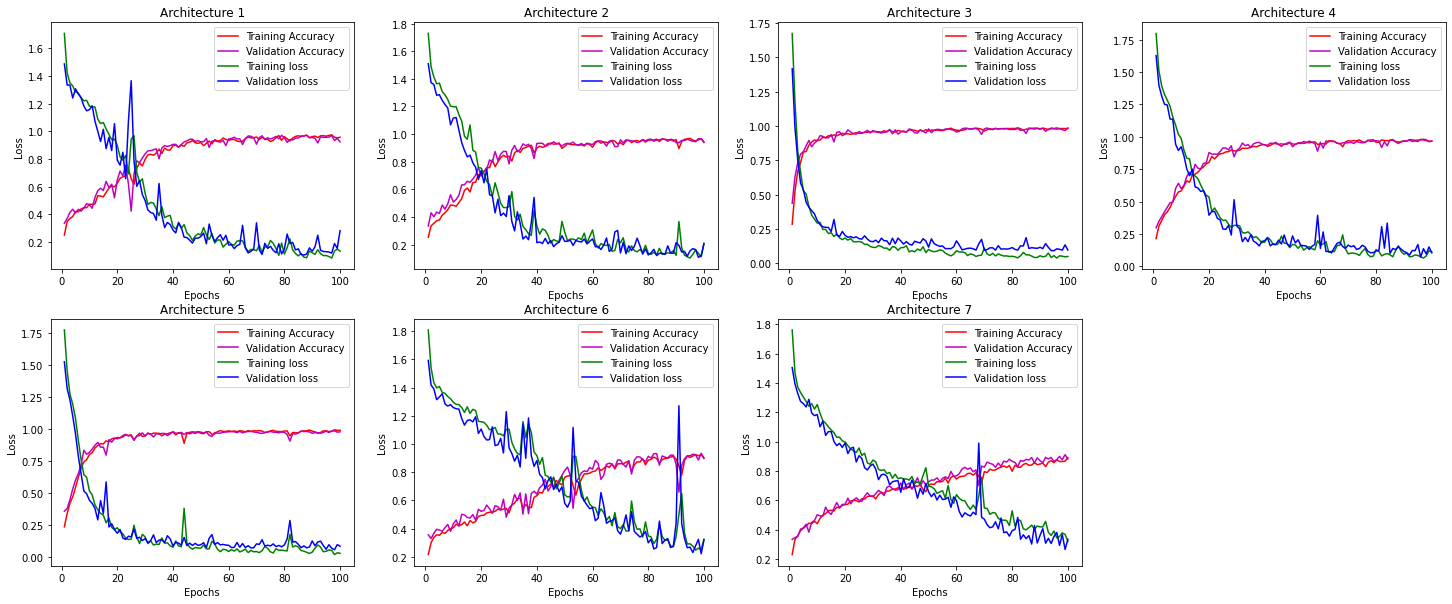

In [ ]:
from IPython.display import display
axes[1, 3].axis('off')
display(fig)

## Plot of Best Architecture

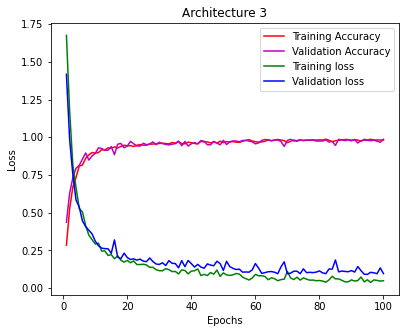

In [ ]:
best = 3

if (best <= 4):
  best_x = 0
  best_y = best - 1
else:
  best_x = 1
  best_y = (best - 1) - 4

# Set the spacing between subplots to zero
fig.subplots_adjust(wspace=0, hspace=0)

# Hide the other subplots
for i in range(2):
    for j in range(4):
        if i != best_x or j != best_y:
            axes[i, j].set_visible(False)

display(axes[best_x, best_y].figure)